In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import scipy
import itertools
from scipy.integrate import odeint
# Reference: Grant Bunker, book 'The Phase Method' 2024
# if transitions in the Phase Plot are rounded in form
# (they should look like step-functions)
# then extend the range (decrease xmin, and increase xmax)
# if LSODA complains that too much accuracy is requested
# then reduce range (increase xmin, and decrease xmax)
#
# suggested improvements to this code:
# (to achieve some parity with Mathematica version)
# parallel mapping of bsearch
# extended precision computations
# improved graphics and output
#
#define potential energy function here
def U(x):
    if abs(x)<3.:
        uu = -10.
    else:
        uu = 0.
    return(uu)

#this is Schr\"odinger's equation as two coupled first order eqns    
def shrek(x, state, e):
    y, yprime = state
    dyprime = 2*(U(x)-e)*y
    dy = yprime
    return [dy, dyprime]

# this code plots the "Phase Plot" for a given energy
def plot_phaseplot(ee):
    y0 = [.01, .01]
    xgrid = np.arange(xmin, xmax, 0.01)
    result = odeint(shrek, y0, xgrid, (ee,), tfirst=True)
    phaseplot = np.tanh(result[:,0])
    plt.clf()
    plt.axhline( )
    plt.plot(xgrid,phaseplot)
    plt.title('energy='+str(ee),loc='center')
    plt.show()
    return()


#this code 'memo-izes' previously computed number-of-bound-states 
#values so they aren't unnecessarily recomputed -> 3x speed-up
#variable 'savednbs' is a python dictionary of key-value pairs
savednbs = {}
def nbs(ee):
    if (ee) in savednbs:
        return([ee,savednbs[ee]])
    y0 = [.1, .1]
    xgrid = np.arange(xmin,xmax, 0.01)
    result = odeint(shrek, y0, xgrid, (ee,), tfirst=True)
    t = np.diff(np.sign(np.tanh(result[:,0])))
    transitions = t[t!=0]/2
    nboundstates=len(transitions)
    savednbs[ee]=nboundstates
    return([ee, nboundstates])

def nstates(ee):
	return(nbs (ee)[1])

def bsearchnbs(intrvl):
    [low,high]=intrvl
    mid =(low+high)/2
    slow = nstates(low)
    shigh = nstates(high)
    smid = nstates(mid)
    newintervals = [ ]
    if slow < smid: 
        newintervals += [[low, mid]]
    if smid < shigh: 
        newintervals += [[mid, high]]
    return(newintervals)

def refine(intervals):
# this maps out the whole eigenvalue spectrum in an initial range 
# using a tree-like binary search
# intervals=[[0.,20.]] example starting interval nested list
# the mapping over the list of intervals would best be done 
# in parallel as in mathematica version
    print("starting interval=",intervals)
    nit=40; # max number of iterations; ~30-40 iterations is OK
    it=0; 
    while it <= nit:
        phaseplot=list(map(bsearchnbs,intervals));
        intervals = list(itertools. chain(*phaseplot));#flattens list
        if it%10==0:
           print("===>iteration=",it,";  nintervals=",\
           len(intervals),";  interval midpoints=")
           evals=list(map(np.mean,intervals))
           ngooddigits=7 #typical for 64 bit arithmetic
           roundit=lambda numb: np.round(numb,ngooddigits)
           print(list(map(roundit,evals)))
           print(" ")
        it=it+1
    phaseplot=list(map(np.mean,intervals))
    evals=list(map(roundit,phaseplot))
    return(evals)



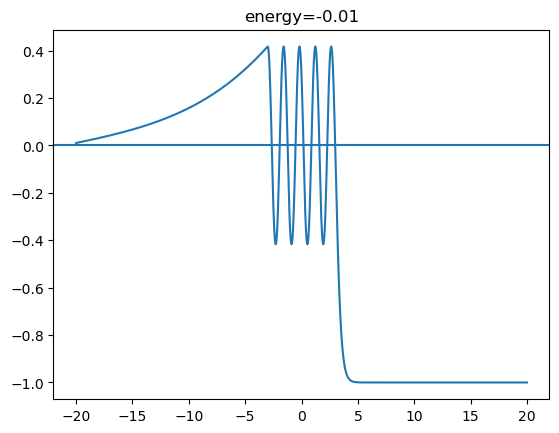

starting interval= [[-10, -0.01]]
===>iteration= 0 ;  nintervals= 2 ;  interval midpoints=
[-7.5025, -2.5075]
 
===>iteration= 10 ;  nintervals= 9 ;  interval midpoints=
[-9.8804907, -9.5244019, -8.9341724, -8.1098022, -7.0561694, -5.7781519, -4.2903833, -2.6123755, -0.8172974]
 
===>iteration= 20 ;  nintervals= 9 ;  interval midpoints=
[-9.8813124, -9.5256523, -8.9342795, -8.1095426, -7.0553239, -5.7780637, -4.2890995, -2.6118396, -0.8174808]
 
===>iteration= 30 ;  nintervals= 9 ;  interval midpoints=
[-9.8813123, -9.5256499, -8.9342781, -8.1095405, -7.0553253, -5.7780628, -4.2891017, -2.61184, -0.8174828]
 
===>iteration= 40 ;  nintervals= 9 ;  interval midpoints=
[-9.8813123, -9.5256499, -8.9342781, -8.1095405, -7.0553253, -5.7780628, -4.2891017, -2.61184, -0.8174828]
 
************* 
final eigenvalue estimates:
[-9.8813123, -9.5256499, -8.9342781, -8.1095405, -7.0553253, -5.7780628, -4.2891017, -2.61184, -0.8174828]

neigs= 9


In [2]:
 # after executing the above code, the following commands 
 # can be entered into Jupyter (for example) to actually get results
(xmin,xmax) = (-20,20)  
startinginterval=[eminsearch,emaxsearch]=[-10,-.01]
nbs(emaxsearch)  
plot_phaseplot(emaxsearch); 
intervals=[startinginterval]; #tees up starting interval for search
evals=refine(intervals); #does the search
print('*************','\nfinal eigenvalue estimates:')
print(evals)  #gives result
print('\nneigs=',len(evals))